# Assignment 1: Image Manipulation and Canny Edge Detection

---

Dr.-Ing. Antje Muntzinger, Hochschule für Technik Stuttgart

antje.muntzinger@hft-stuttgart.de

---

In this notebook, we practice some basic image manipulation techniques in OpenCV including Canny edge detection. These are the foundation of later computer vision applications.

In [1]:
# !pip install pipenv
# install required packages specified in pipfile
# !pipenv install

In [2]:
# imports
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np
import cv2

Task 1: Basic Image Manipulation in OpenCV
=

**TODO**: 1a) Load a color image of your choice, preferably a picture you took yourself. Convert it to a color format of your choice, and display it. **(1.5 points)**

The original image is of size: (487, 661, 3)


Text(0.5, 1.0, 'RGB Image')

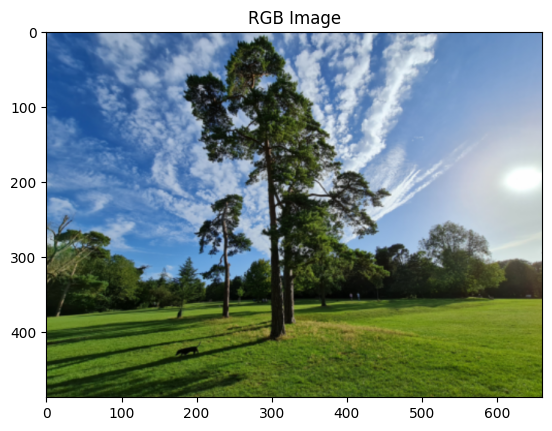

In [3]:
##### TODO: YOUR CODE GOES HERE

# 1. Load a color image
input_img = cv2.imread("./images/cv-landscape.png", 1) # flag 1 indicates color picture

# 2. Convert the image from OpenCV BGR to Matplotlib RGB and display it

## 2.1 OpenCV BGR -> Matplotlib RGB
img_RGB = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)

## 2.2 Store a backup as a failsafe
img_RGB_backup = img_RGB.copy()

## 2.3 Check original image shape
print(f"The original image is of size: {img_RGB.shape}")

## 2.4 Store the variables - height, width, channels to use later
height, width, channels = img_RGB.shape # unzip the tuple

## 2.5 Display image (color)
plt.imshow(img_RGB)
plt.title("RGB Image")

**TODO**: 1b) Color the 10th pixel row of the image in red. Plot the upper left 500x500 pixel image cutout to verify your result. **(2 points)**

Hint: Indexing starts at 0 in Python! Remember the image origin is in the upper left image corner.

Text(0.5, 1.0, 'Red line in 10th row')

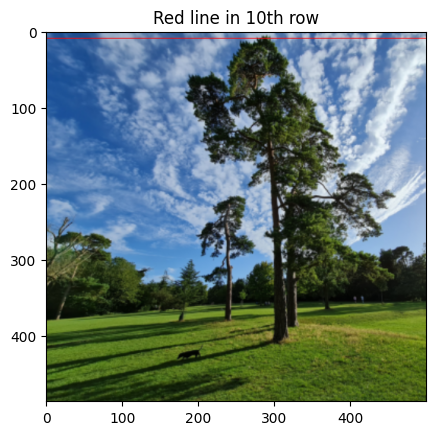

In [4]:
##### TODO: YOUR CODE GOES HERE

# 1. Color the 10th pixel row of the image in red

## 1.1 Variable to store the RGB format for red
red = np.array([255, 0, 0])

## 1.2 Set the 10th row to red
img_RGB[9,:] = red # 0 indexing

# 2. Display upper left 500x500 cutout

## 2.1 Top 500x500 pixel cutout
img_RGB_cutout = img_RGB[:500, :500]

## 2.2 Display Cutout
plt.imshow(img_RGB_cutout)
plt.title("Red line in 10th row")

**TODO**: 1c) Print the color values of the rightmost Pixel in the 9th row, as well as the color values of the leftmost Pixel in the 10th row. **(2 points)**

In [5]:
##### TODO: YOUR CODE GOES HERE

# 1. Color values of the rightmost pixel in 9th row
print(f"The color values of the rightmost pixel in the 9th row in ([R G B]) format is:= {img_RGB[8,width-1]}")

# 2. Color values of the leftmost pixel in 10th row
print(f"The color values of the leftmost pixel in the 10th row in ([R G B]) format is:= {img_RGB[9,0]}")

The color values of the rightmost pixel in the 9th row in ([R G B]) format is:= [119 153 201]
The color values of the leftmost pixel in the 10th row in ([R G B]) format is:= [255   0   0]


**TODO**: 1d) Flatten the color image, i.e., convert it from the 3D
array to a 1D array. Find at least two different commands that achieve the desired result. Check your output with `shape`. **(3 points)**

In [6]:
##### TODO: YOUR CODE GOES HERE

# 1. `reshape()`
flat_img_RGB1 = img_RGB.reshape(-1)
print(f"OpenCV | Shape reshape():= {flat_img_RGB1.shape}")

# 2. `ravel()`
flat_img_RGB2 = img_RGB.ravel()
print(f"OpenCV | Shape ravel():= {flat_img_RGB2.shape}")

# 3. `flatten()`
flat_img_RGB3 = img_RGB.flatten()
print(f"OpenCV | Shape flatten():= {flat_img_RGB3.shape}")

# 4. NumPy `ravel()`
flat_img_RGB4 = np.ravel(img_RGB)
print(f"NumPy | Shape ravel():= {flat_img_RGB4.shape}")

OpenCV | Shape reshape():= (965721,)
OpenCV | Shape ravel():= (965721,)
OpenCV | Shape flatten():= (965721,)
NumPy | Shape ravel():= (965721,)


**TODO**: 1e) As before, print the color values of the rightmost Pixel in the 9th row, as well as the color values of the leftmost Pixel in the 10th row, but use the flattened image now. Verify that the result is the same as before. **(2 points)**

In [7]:
# Function to return the starting index manually for the flattened image
def return_index(img_RGB, row, col):
  height, width, channels = img_RGB.shape
  i = (((row-1)*width) + (col-1))*channels
  return i

In [8]:
##### TODO: YOUR CODE GOES HERE

# 0. Flatten the main image to a new variable
img_RGB_flat = np.ravel(img_RGB)

## Index of 9th row + Last column
# i = (((9-1)*width) + (width-1))*channels
i = return_index(img_RGB, 9, width)

## Index of 10th row + 1st column
# j = (((10-1)*width) + (1-1))*channels
j = return_index(img_RGB, 10, 1)

# Using flattened image
print("1. Using flattened images...")
print(f"The color values of the rightmost pixel in the 9th row in flattened ([R G B]) format is:= {img_RGB_flat[i:i+channels]}")
print(f"The color values of the leftmost pixel in the 10th row in flattened ([R G B]) format is:= {img_RGB_flat[j:j+channels]}")

# Using previous code
print("2. Using previous code...")
print(f"The color values of the rightmost pixel in the 9th row in ([R G B]) format is:= {img_RGB[8,-1]}")
print(f"The color values of the leftmost pixel in the 10th row in ([R G B]) format is:= {img_RGB[9,0]}")

1. Using flattened images...
The color values of the rightmost pixel in the 9th row in flattened ([R G B]) format is:= [119 153 201]
The color values of the leftmost pixel in the 10th row in flattened ([R G B]) format is:= [255   0   0]
2. Using previous code...
The color values of the rightmost pixel in the 9th row in ([R G B]) format is:= [119 153 201]
The color values of the leftmost pixel in the 10th row in ([R G B]) format is:= [255   0   0]


**TODO**: 1f) Split the three color channels and display them separately. Can you see from the plotted images which color channel is displayed in which image (without looking at the code), or do the three channels not differ much? Write your answer in the markdown cell below the code. **(2 points)**

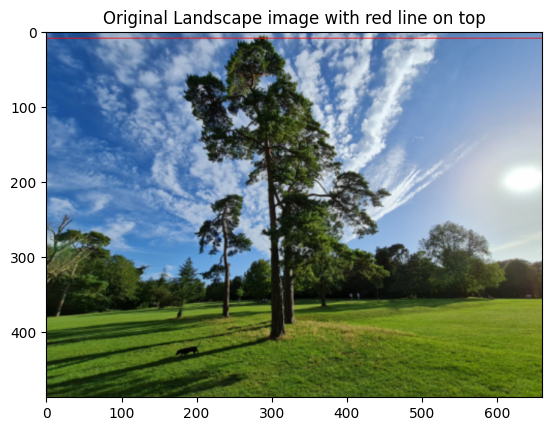

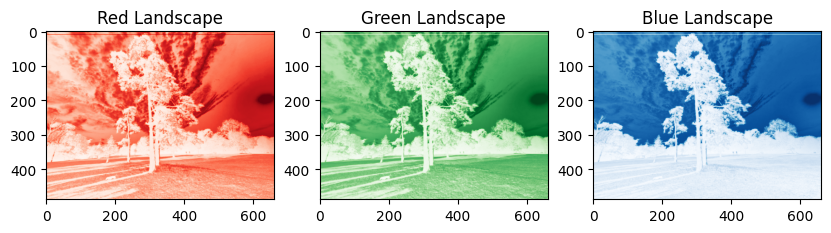

In [9]:
##### TODO: YOUR CODE GOES HERE

# 1. Split the three color channels
r,g,b = cv2.split(img_RGB)

# 2. Plot original image, then the three channels for comparison
plt.imshow(img_RGB)
plt.title('Original Landscape image with red line on top')
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10, 30))
ax1.imshow(r,cmap = 'Reds')
ax1.title.set_text('Red Landscape')
ax2.imshow(g,cmap = 'Greens')
ax2.title.set_text('Green Landscape')
ax3.imshow(b,cmap = 'Blues')
ax3.title.set_text('Blue Landscape')

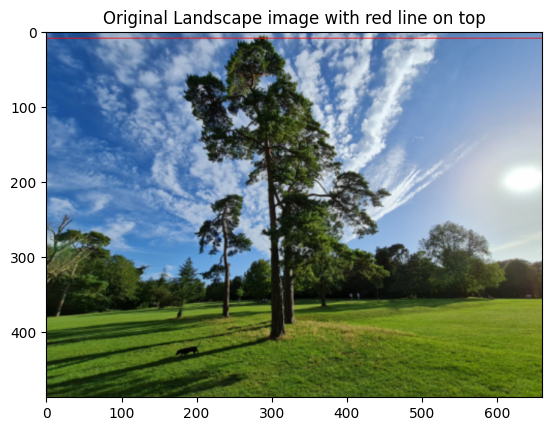

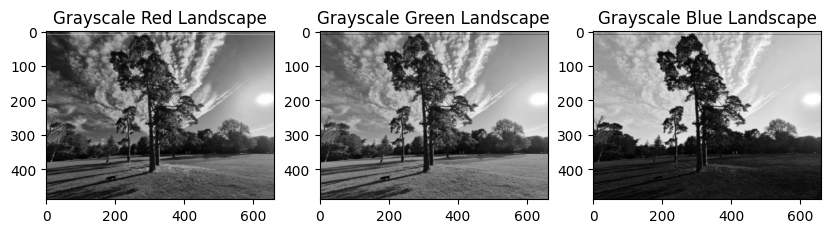

In [10]:
# 1. Split the three color channels
r,g,b = cv2.split(img_RGB)

# 2. Plot original image, then the three channels for comparison
plt.imshow(img_RGB)
plt.title('Original Landscape image with red line on top')
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10, 30))
ax1.imshow(r,cmap = 'gray')
ax1.title.set_text('Grayscale Red Landscape')
ax2.imshow(g,cmap = 'gray')
ax2.title.set_text('Grayscale Green Landscape')
ax3.imshow(b,cmap = 'gray')
ax3.title.set_text('Grayscale Blue Landscape')

**YOUR ANSWER**:

* The grayscale red and green channels look almost similar, while the blue channel appears slightly different for the image taken above.
* Channels work differently for predominant colors present in the colored image.

Task 2: Edge Detection
=

**TODO**: 2a) Choose a part of the image that you find interesting for later corner and edge detection. Store the cutout in a new grayscale image. **(1 point)**

Text(0.5, 1.0, 'Grayscale image of the cutout')

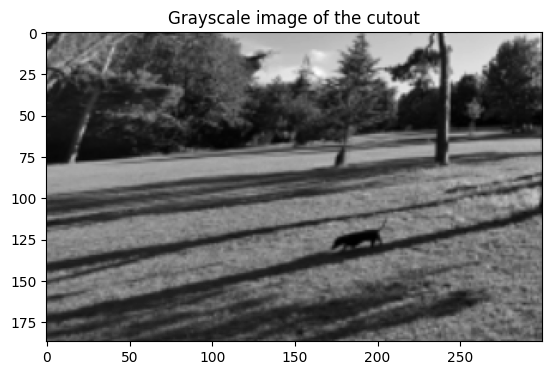

In [11]:
##### TODO: YOUR CODE GOES HERE

# 1. Choosing an interesting cutout
cutout_RGB = img_RGB[300:, :300]

# 2. Store the output in a new grayscale image
cutout_GRAY = cv2.cvtColor(cutout_RGB, cv2.COLOR_RGB2GRAY)

# 3. Display the image in grayscale image
plt.imshow(cutout_GRAY, cmap="gray")
plt.title("Grayscale image of the cutout")


**TODO**: 2b) Find a part of the cutout that you think might be difficult to detect edges in with Canny. Mark this part in the grayscale cutout with a red square. Write a short explanation why this could be difficult below. **(2 points)**

Hint: Note that you cannot plot color into a grayscale image. One option is to convert the grayscale image to RGB first, using `COLOR_GRAY2RGB`.

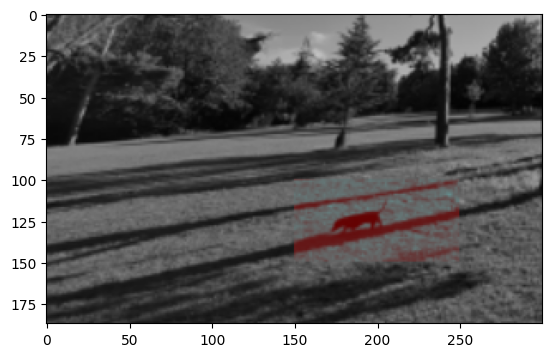

In [12]:
##### TODO: YOUR CODE GOES HERE

# 0. Backup for failsafe
cutout_GRAY_backup = cutout_GRAY.copy()

# 1. Convert Gray to RGB
cutout_RGB2 = cv2.cvtColor(cutout_GRAY, cv2.COLOR_GRAY2RGB)

# 2. Marking the region of interest (roi) with a red square
cutout_RGB2[100:150, 150:250,0] = 100 # (0=b, 1=g, 2=r), 100 is the hue
plt.imshow(cutout_RGB2)

**YOUR ANSWER**:

* The chosen region is a smooth area with low contrast. Canny edge detection relies on finding significant intensity changes.
* In this area, the intensity changes are subtle, making it difficult for Canny to distinguish edges effectively.

**TODO**: 2c) Resize the gray cutout to 1/4th of the original size, keeping the aspect ratio. Plot both grayscale images next to each other using Matplotlib's `subplots`.

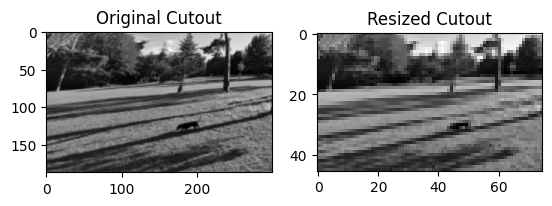

In [13]:
##### TODO: YOUR CODE GOES HERE

# 0. Height and width of the grayscale image
h,w = cutout_GRAY.shape

# 1. New Scaling
new_w = int(w // 4)
new_h = int(h*(new_w/w)) # keeping aspect ratio

# 2. Resized Grayscale image
cutout_GRAY_resize = cv2.resize(cutout_GRAY, (new_w, new_h), interpolation = cv2.INTER_AREA)

# 3. Plot both the grayscale images next to each other
fig, (ax1, ax2) = plt.subplots(1,2)

## 3.1 Original image
ax1.imshow(cutout_GRAY, cmap="gray")
ax1.set_title("Original Cutout")

## 3.2 Resized image
ax2.imshow(cutout_GRAY_resize, cmap="gray")
ax2.set_title("Resized Cutout")

## 3.3 Display
plt.show()

**TODO**: 2d) Apply Gaussian blur with a kernel of size 9 to the resized image and plot the result. **(1 point)**

Text(0.5, 1.0, 'Grayscale cutout with Gaussian Blur (Kernel Size: 9)')

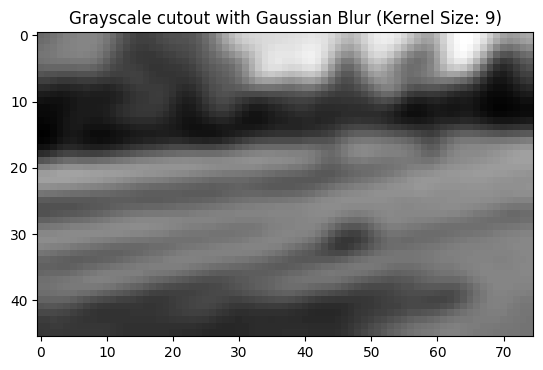

In [14]:
##### TODO: YOUR CODE GOES HERE

# 1. Parameters for Canny
th1=10
th2=th1*3
d=4 # gaussian blur

# 2. blur the image to remove noise
edgeresult = cv2.cvtColor(cutout_GRAY_resize, cv2.COLOR_GRAY2RGB)
# edgeresult = cv2.GaussianBlur(edgeresult, (2*d+1, 2*d+1), -1)[d:-d,d:-d] # 2*4+1 = 9, kernel size
edgeresult = cv2.GaussianBlur(edgeresult, (9,9), 0) # kernel size 9

# 3. Convert to grayscale
gray = cv2.cvtColor(edgeresult, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap="gray")
plt.title("Grayscale cutout with Gaussian Blur (Kernel Size: 9)")

**TODO**: 2e) Detect the edges in the blurred cutout using Canny edge detector. Adapt the Canny thresholds for an optimal result. Plot the edges in blue into the grayscale cutout. **(3 points)**

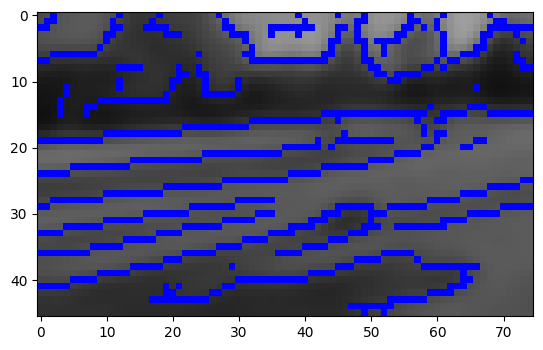

In [15]:
##### TODO: YOUR CODE GOES HERE

# apply Canny edge detection
edge = cv2.Canny(gray, th1, th2)

# plot result
edgeresult[edge != 0] = (0, 0, 255) # (r,g,b) this takes pixels in edgeresult where edge non-zero colours them bright blue
plt.imshow(edgeresult)

**TODO**: 2f) Check if your prediction of difficulty was correct. Do you see a) real edges that were missed by Canny (false negatives) or b) detected edges that are not there in reality (false positives)? Try to experiment with the Canny thresholds and solve these difficulties. How did you try to solve the difficulties? Write your answer below the code. **(1.5 points)**

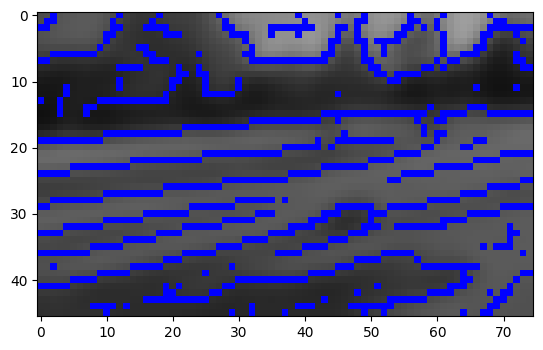

In [16]:
##### Testing

# 1. Parameters for Canny
th1=1
th2=th1*3

# 2. blur the image to remove noise
edgeresult = cv2.cvtColor(cutout_GRAY_resize, cv2.COLOR_GRAY2RGB)
edgeresult = cv2.GaussianBlur(edgeresult, (9,9), 0)

# 3. Convert to grayscale

# apply Canny edge detection
edge = cv2.Canny(gray, th1, th2)

# plot result
edgeresult[edge != 0] = (0, 0, 255) # (r,g,b) this takes pixels in edgeresult where edge non-zero colours them bright blue
plt.imshow(edgeresult)

**YOUR ANSWER**:

* One possible solution to fine tune the thresholds are to lower the values of `th1` and `th2` for sensitive detection.
* Lower values means more edges can be detected. Here, we tried experimenting with a lower value for `th1` and we got a few extra edges.

Well done, you are now able to apply basic image manipulation techniques as well as Canny edge detection to images in OpenCV!

Task 3: Theory Questions
=

**TODO**: 3a) What is the problem of applying image derivatives for edge detection in noisy images? What is a possible solution to that problem? Can you give an example in which you often get noise when taking a photo? **(3 points)**

**YOUR ANSWER**:

3a). The problem is that the derivatives amplify noise.

3b). A possible solution is to smooth the image before applying derivatives, like the one we have used in our assignment i.e.,  Gaussian Blur filtering.

3c). An example to often get noise when taking a photo -> Low-light photography which introduces noise due to the low light intensity.

**TODO**: 3b) You are given a 3×3 pixel input image $
\begin{array}{|ccc|}
\hline
 1 & 2 & 3  \\
 4 & 5 & 6  \\
 7 & 8 & 9  \\
\hline   
\end{array}$
and a 3×3 pixel filter $\begin{array}{|ccc|}
\hline
 -1 & 0 & 1  \\
 -1 & 0 & 1  \\
 -1 & 0 & 1  \\
\hline   
\end{array}$. Compute the 3 × 3 pixel result image of the correlation of the filter with the input image. All pixels outside the input image are padded with zeros. **(4.5 points)**

**YOUR ANSWER**:

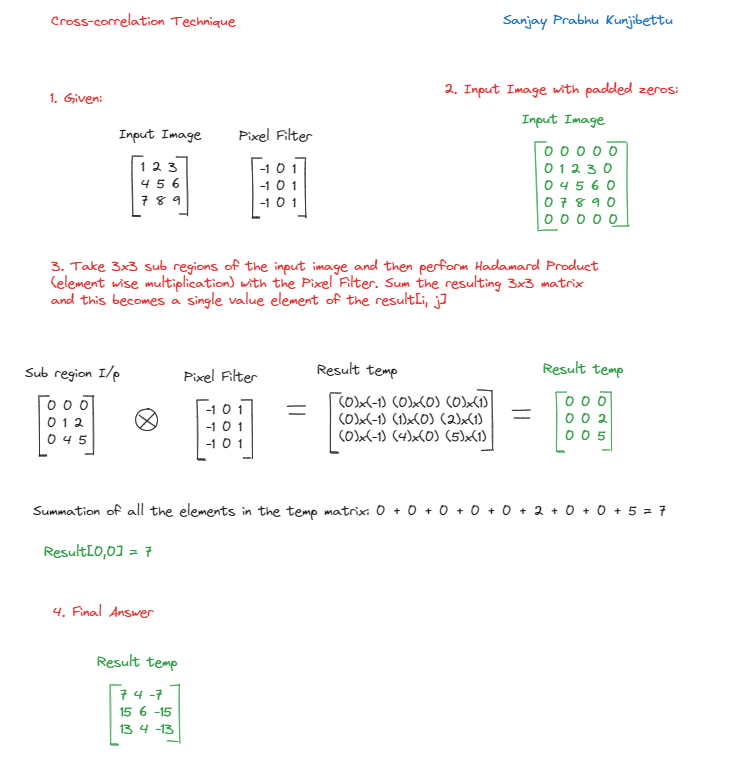

**TODO**: 3c) What patterns does this special filter respond to? How can you see this in the result from 3b)? **(2 points)**

**YOUR ANSWER**:

1. This specific filter, with all its values -1, 0, and 1, responds to horizontal edges in the image.

2. The filter emphasizes changes in intensity (edges) by highlighting them with positive correlation values in the result.

3. Flat regions with minimal intensity variations will have correlation values close to zero.

4. Results from 3b):

`Positive values (7, 15, 13) appear in positions corresponding to edges in the original image.`

`Negative values (-7, -15, -13) appear in areas around the edges, likely due to the opposing side of the edge influencing the correlation.`

**TODO**: 3d) Please calculate the result using the settings from task 3b), but with convolution instead of correlation. **(4.5 points)**

**YOUR ANSWER**:

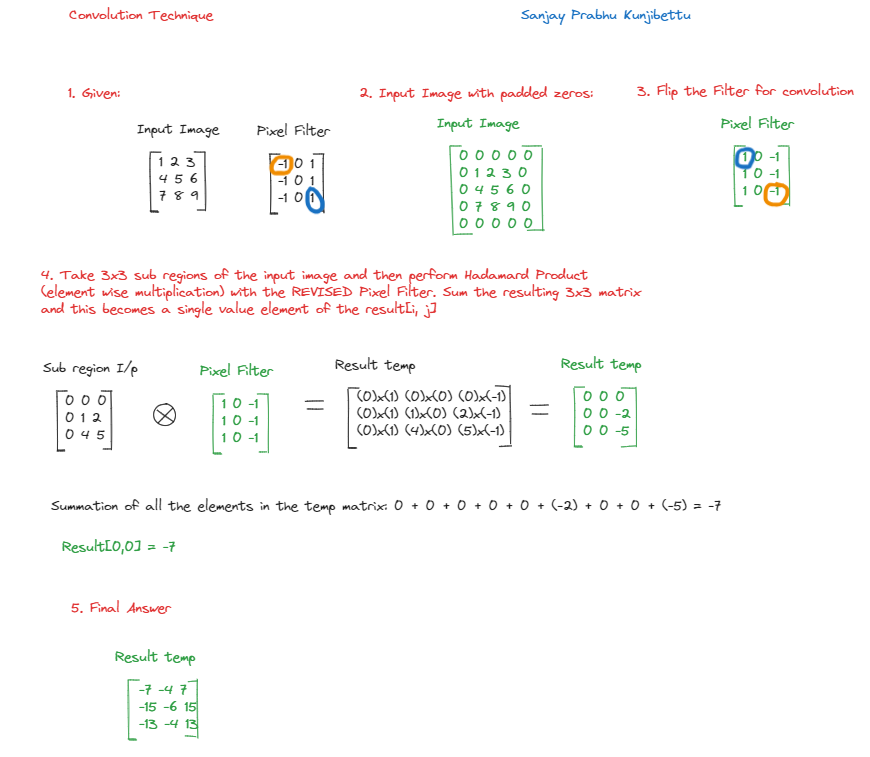